In [5]:
# This notebook plays with the MNIST digits dataset, for which I use the
# parser https://pypi.org/project/python-mnist/
# and the official data source http://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/gzip.zip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

(images, labels), (testX, testY) = mnist.load_data()

trainX = np.array(images).astype('float32') / 255
trainY = np.array(labels)

testX = np.array(testX).astype('float32') / 255
testY= np.array(testY)

In [ ]:
# 0.890   perceptron, 0 hidden layers.
# 0.8966  linear 1-layer classifier
# 0.952   for default MLPClassifier, hidden = (100,) 
# 0.9659   MLP  hidden= (400,) logistic 
# 0.973   2-layer MLP  hidden = (400,200) default relu activation



In [6]:
# Nitish_Gangwar     06 Oct, 2021 
# Applying Convolutional Neural Network on mnist dataset
# https://www.geeksforgeeks.org/applying-convolutional-neural-network-on-mnist-dataset/
    
import numpy as np
import keras
#from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k

In [11]:
# This is a method to perform one-hot encoding...
y_train = keras.utils.to_categorical(trainY)
y_test = keras.utils.to_categorical(testY)

In [13]:
trainX = trainX.reshape((-1,28,28))
img_rows, img_cols=28, 28
inpx = (1, img_rows, img_cols)
Y = y_train.T

In [15]:
img_rows, img_cols=28, 28
x_train =trainX
x_test = testX
print("Shape x_train", x_train.shape)
# k.image_data_format() == "channels_last"
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
inpx = (img_rows, img_cols, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Shape x_train (60000, 28, 28)


In [16]:
k.image_data_format()

'channels_last'

In [17]:
X.shape, y_train.shape

((1, 28, 28, 60000), (60000, 10))

In [19]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)

TypeError: Cannot iterate over a Tensor with unknown first dimension.

In [54]:
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])
 
model.fit(X, y_train, epochs=12, batch_size=500)

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_14'), name='input_14', description="created by layer 'input_14'") at layer "conv2d_17". The following previous layers were accessed without issue: []

In [22]:
X.shape, y_train.shape

((28, 28, 60000), (60000, 10))

In [ ]:
p.shape

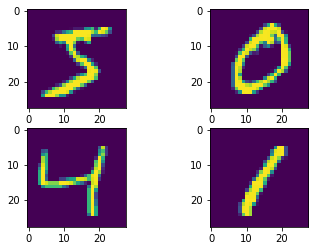

In [ ]:
# And it turns out the indexes for the row- and column- reordering are buried in ax_col_dendrogram:
dir(clustermap.ax_col_dendrogram)

In [ ]:
# To get the reordering of the rows and columns,
# https://github.com/mwaskom/seaborn/issues/1207
# I need clustermap.dendrogram_row.reordered_ind
clustermap.dendrogram_row.reordered_ind [ 0:20]

In [ ]:
# Asking clustermap to compare my rows and columns...
# Let us try PCA, linear-algebra-only dimension reduction approach.

from sklearn.decomposition import PCA
pca=PCA(n_components=30)
pca.fit(sample.T)

In [ ]:
pca.components_.shape

In [ ]:
plt.scatter(pca.components_[0,:], pca.components_[1,:])

In [ ]:
plt.scatter(pca.components_[0,:], pca.components_[1,:], color=colorlabels100)

In [ ]:
plt.scatter(pca50.components_[0,:], pca50.components_[1,:], color=colorlabelsall)
plt.xlabel("PC 1    "+"{:.1f}".format(pca50.explained_variance_ratio_[0] * 100) + "%"); 
plt.ylabel("PC 2    "+"{:.1f}".format(pca50.explained_variance_ratio_[1] * 100) + "%"); 

In [ ]:
pca50.components_.shape

In [ ]:
# Fit TSNE on subset of the big PCA output, but since TSNE takes too long for 10^{4} points, use only 
# 1000 samples
TSNE1K = TSNE(n_components=2, learning_rate=.1, init='random').fit(pca50.components_[:,0:1000].T)